# Customer Behavior & Churn Analysis

## 1. Data Loading

In [9]:
import pandas as pd
import numpy as np
import pyodbc


In [10]:
conn = pyodbc.connect(
    "DRIVER={SQL Server};"
    "SERVER=DESKTOP-I8ADR68\\SQLEXPRESS;"
    "DATABASE=ecommerce;"
    "Trusted_Connection=yes;"
)


In [11]:
query = " select * from ecommerce_data"
df=pd.read_sql(query,conn)
df

C:\Users\T470\AppData\Local\Temp\ipykernel_9512\2003014829.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


Age  Gender Country         City  Membership_Years  Login_Frequency  \
0      43.0    Male  France    Marseille               2.9             14.0   
1      36.0    Male      UK   Manchester               1.6             15.0   
2      45.0  Female  Canada    Vancouver               2.9             10.0   
3      56.0  Female     USA     New York               2.6             10.0   
4      35.0    Male   India        Delhi               3.1             29.0   
...     ...     ...     ...          ...               ...              ...   
49995  38.0  Female     USA  Los Angeles              10.0             10.0   
49996  37.0    Male     USA      Chicago               1.4             21.0   
49997  44.0  Female     USA      Phoenix               2.8             19.0   
49998  41.0  Female     USA      Chicago               2.9             17.0   
49999  56.0    Male      UK        Leeds               2.2              2.0   

       Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0                      27.4                6.0                   50.6   
1                      42.7               10.3                   37.7   
2                      24.8                1.6                   70.9   
3                      38.4               14.8                   41.7   
4                      51.4                8.7                   19.1   
...                     ...                ...                    ...   
49995                  35.8                8.8                   51.2   
49996                  32.4                9.6                   32.5   
49997                  40.3               10.4                   50.6   
49998                  29.9               10.1                   60.8   
49999                  18.2                8.7                   46.0   

       Wishlist_Items  ...  Customer_Service_Calls  Product_Reviews_Written  \
0                   3  ...                       9                        4   
1                   1  ...                       7                        3   
2                   1  ...                       4                        1   
3                   9  ...                       2                        5   
4                   9  ...                       1                       11   
...               ...  ...                     ...                      ...   
49995               3  ...                       5                        1   
49996               2  ...                       5                        3   
49997               1  ...                       4                        6   
49998               1  ...                       5                        2   
49999               0  ...                       7                        0   

       Social_Media_Engagement_Score  Mobile_App_Usage  \
0                               16.3              20.8   
1                               29.4              23.3   
2                               29.4               8.8   
3                               85.9              31.0   
4                               83.0              50.4   
...                              ...               ...   
49995                           20.7              25.2   
49996                           38.6              12.1   
49997                           59.9              19.4   
49998                           29.4              14.1   
49999                            0.0               4.2   

       Payment_Method_Diversity  Lifetime_Value  Credit_Balance  Churned  \
0                             1          953.33          2278.0        0   
1                             3         1067.47          3028.0        0   
2                             2         1289.75          2317.0        0   
3                             3         2340.92          2674.0        0   
4                             4         3041.29          5354.0        0   
...                         ...             ...             ...      ...   
4999

In [4]:
df.shape

(50000, 26)

In [5]:

df.dtypes

Age                              float64
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                  float64
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                     int64
Total_Purchases                    int64
Average_Order_Value              float64
Days_Since_Last_Purchase         float64
Discount_Usage_Rate              float64
Returns_Rate                     float64
Email_Open_Rate                  float64
Customer_Service_Calls             int64
Product_Reviews_Written            int64
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity           int64
Lifetime_Value                   float64
Credit_Balance                   float64
Churned                            int64
Signup_Quarter  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           50000 non-null  float64
 7   Pages_Per_Session              50000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 50000 non-null  int64  
 10  Total_Purchases                50000 non-null  int64  
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       49989 non-null 

In [7]:
numeric_cols = [
    'Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg',
    'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items',
    'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase',
    'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
    'Customer_Service_Calls', 'Product_Reviews_Written',
    'Social_Media_Engagement_Score', 'Mobile_App_Usage',
    'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance'
]


In [8]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           50000 non-null  float64
 7   Pages_Per_Session              50000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 50000 non-null  int64  
 10  Total_Purchases                50000 non-null  int64  
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       49989 non-null 

In [10]:
df['Churned'].value_counts()

Churned
0    35550
1    14450
Name: count, dtype: int64

In [11]:
df['Churned'] = df['Churned'].astype(int)

In [12]:
df.isnull().sum()

Age                               0
Gender                            0
Country                           0
City                              0
Membership_Years                  0
Login_Frequency                   0
Session_Duration_Avg              0
Pages_Per_Session                 0
Cart_Abandonment_Rate             0
Wishlist_Items                    0
Total_Purchases                   0
Average_Order_Value               0
Days_Since_Last_Purchase         11
Discount_Usage_Rate               0
Returns_Rate                      0
Email_Open_Rate                   0
Customer_Service_Calls            0
Product_Reviews_Written           0
Social_Media_Engagement_Score     0
Mobile_App_Usage                  0
Payment_Method_Diversity          0
Lifetime_Value                    0
Credit_Balance                    0
Churned                           0
Signup_Quarter                    0
Has_Purchased                     0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
numeric_cols = [
    'Age',
    'Membership_Years',
    'Login_Frequency',
    'Session_Duration_Avg',
    'Pages_Per_Session',
    'Cart_Abandonment_Rate',
    'Average_Order_Value',
    'Days_Since_Last_Purchase',
    'Discount_Usage_Rate',
    'Returns_Rate',
    'Email_Open_Rate',
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Lifetime_Value',
    'Credit_Balance'
]


count_cols = [
    'Total_Purchases',
    'Wishlist_Items',
    'Customer_Service_Calls',
    'Product_Reviews_Written',
    'Payment_Method_Diversity'
]

#boolean and target column 
binary_cols = [
    'Churned'
]


In [15]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
df['Churned'].value_counts()


Churned
0    35550
1    14450
Name: count, dtype: int64

In [17]:
# by using normaize = true it gives proportions instead of the counts
df['Churned'].value_counts(normalize=True) * 100

Churned
0    71.1
1    28.9
Name: proportion, dtype: float64

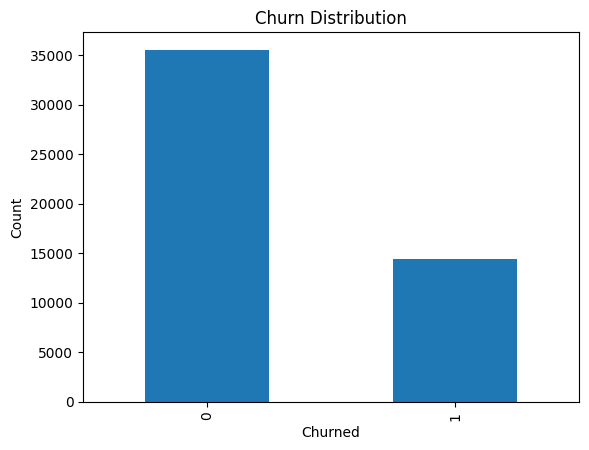

In [18]:
import matplotlib.pyplot as plt

df['Churned'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()


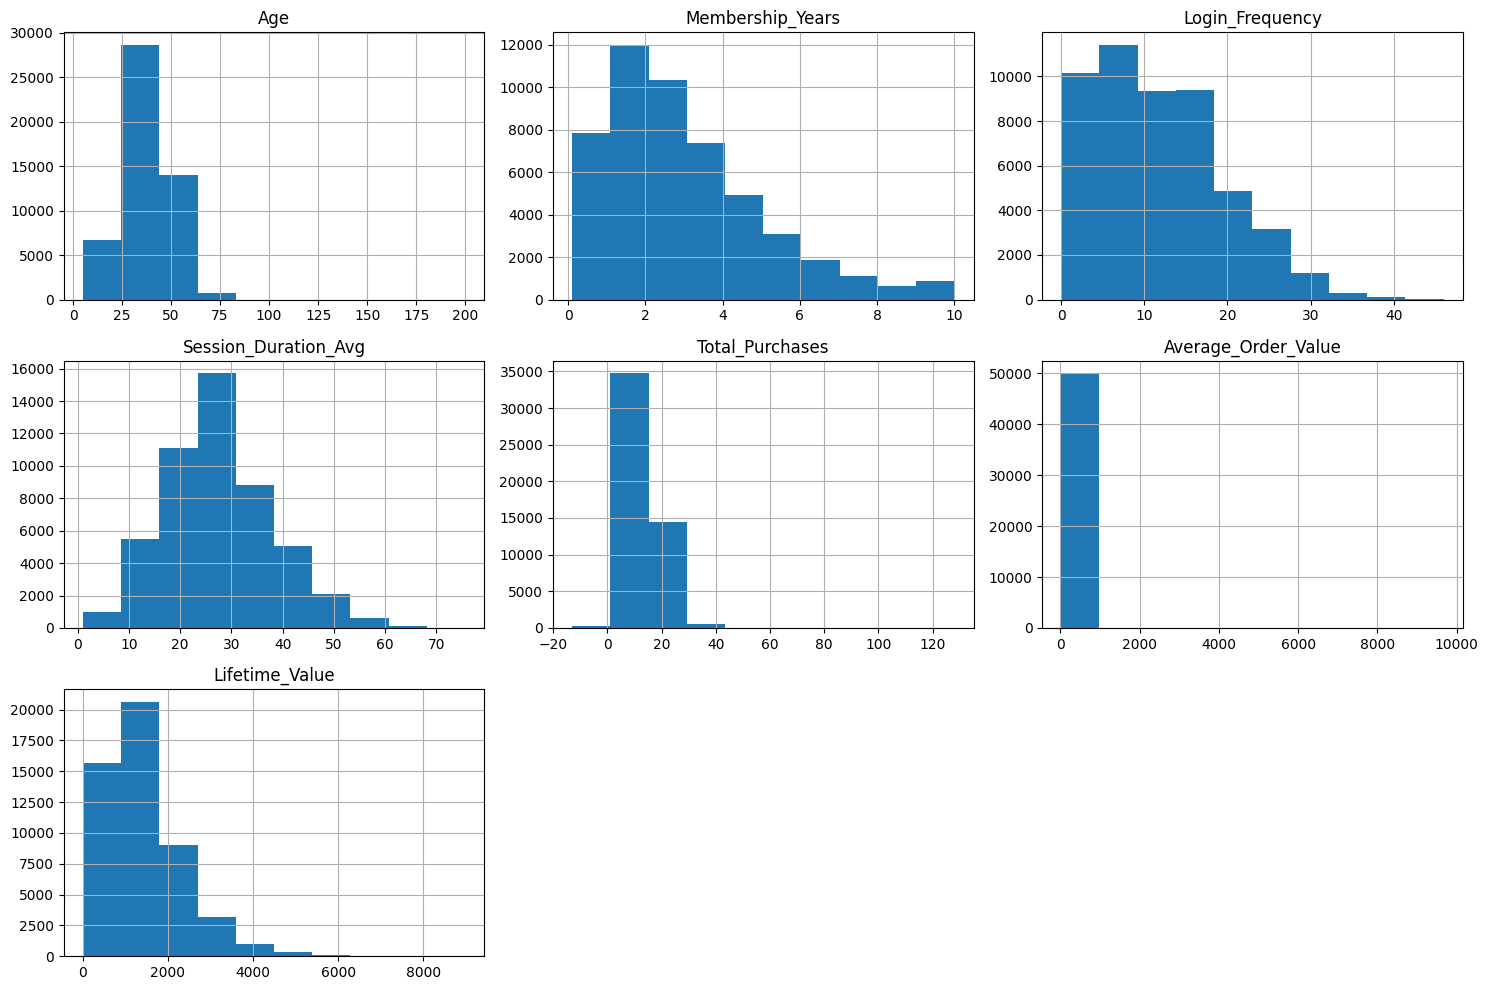

In [19]:
num_cols = [
    'Age', 'Membership_Years', 'Login_Frequency',
    'Session_Duration_Avg', 'Total_Purchases',
    'Average_Order_Value', 'Lifetime_Value'
]

df[num_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [20]:
df['Gender'].value_counts()

Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64

In [21]:
df['Days_Since_Last_Purchase'] = df['Days_Since_Last_Purchase'].fillna(9999)


In [22]:
pd.crosstab(df['Gender'], df['Churned'], normalize='index') * 100


Churned          0          1
Gender                       
Female   71.026437  28.973563
Male     71.269888  28.730112
Other    68.729989  31.270011

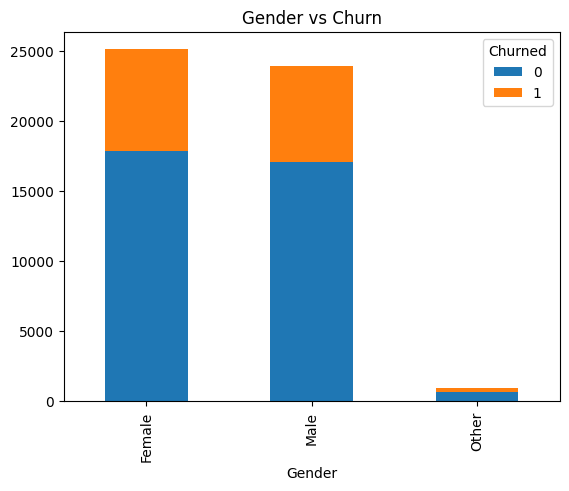

In [23]:
pd.crosstab(df['Gender'], df['Churned']).plot(kind='bar', stacked=True)
plt.title('Gender vs Churn')
plt.show()

In [24]:
top_countries = df['Country'].value_counts().head(10).index

pd.crosstab(
    df[df['Country'].isin(top_countries)]['Country'],
    df['Churned'],
    normalize='index'
) * 100


Churned            0          1
Country                        
Australia  70.105885  29.894115
Canada     70.645858  29.354142
France     72.713681  27.286319
Germany    71.167513  28.832487
India      70.985194  29.014806
Japan      72.174254  27.825746
UK         71.210512  28.789488
USA        70.915785  29.084215

In [25]:
# “We currently serve 50,000 customers, which forms the baseline for all revenue, churn, and engagement analysis.”
total_customers = df.shape[0]
total_customers

50000

In [26]:
# “Our churn rate of X% shows how effectively we are retaining customers and highlights the urgency of retention strategies.”
churn_rate = df['Churned'].mean() * 100
churn_rate

np.float64(28.9)

In [27]:
# Customers log in X times per month, showing how regularly the platform is part of their routine.”
df['Login_Frequency'].mean()


np.float64(11.62466)

In [28]:
# “Users spend X minutes per session and view Y pages, indicating how engaging and intuitive the platform experience is.”
df[['Session_Duration_Avg','Pages_Per_Session']].mean()


Session_Duration_Avg    27.663422
Pages_Per_Session        8.735542
dtype: float64

In [29]:
# “Only X% of users convert into buyers, revealing a gap between engagement and monetization.”
(df['Total_Purchases'] > 0).mean() * 100


np.float64(99.902)

In [30]:
# “The average order value of ₹X indicates strong upsell potential per transaction.”
df.loc[df['Total_Purchases'] > 0, 'Average_Order_Value'].mean()


np.float64(123.11255630517907)

In [31]:
# “Customers generate ₹X lifetime value, guiding marketing spend and loyalty investments.”
df['Lifetime_Value'].mean()


np.float64(1440.6262920000001)

In [32]:
# “A cart abandonment rate of X% highlights checkout friction and lost revenue opportunities.”
df['Cart_Abandonment_Rate'].mean()


np.float64(57.07997199999999)

In [33]:
# “Customers last purchased X days ago on average, helping identify churn-risk segments.”
df.loc[df['Total_Purchases'] > 0, 'Days_Since_Last_Purchase'].mean()


np.float64(29.269724329843246)

In [34]:
# “High discount usage indicates price sensitivity and margin pressure.”


In [35]:
# “Shows what % of our customers make repeat purchases. High repeat purchase rates indicate strong loyalty and reduced marketing acquisition cost.”
repeat_rate = (df['Total_Purchases'] > 1).sum() / len(df) * 100
print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")


Repeat Purchase Rate: 99.55%


In [36]:
# High wishlist-to-purchase ratio signals interest without conversion—possible friction in pricing, stock, or UX.
df['Wishlist_to_Purchase_Ratio'] = df.apply(lambda x: x['Wishlist_Items']/x['Total_Purchases'] if x['Total_Purchases']>0 else None, axis=1)
wishlist_ratio = df['Wishlist_to_Purchase_Ratio'].mean()
print(f"Wishlist-to-Purchase Ratio: {wishlist_ratio:.2f}")


Wishlist-to-Purchase Ratio: 0.31


In [37]:
recency_index = df[df['Total_Purchases']>0]['Days_Since_Last_Purchase'].mean()
print(f"Average Recency (Days): {recency_index:.2f}")


Average Recency (Days): 29.27


In [38]:
# High return rates increase operational costs and reduce profitability. Helps prioritize product/quality improvements.
returns_risk = df[df['Total_Purchases']>0]['Returns_Rate'].mean()
print(f"Returns Risk Rate: {returns_risk:.2f}%")


Returns Risk Rate: 6.68%


In [39]:
support_load = df['Customer_Service_Calls'].mean()
print(f"Average Support Calls: {support_load:.2f}")


Average Support Calls: 5.66


In [40]:
avg_reviews = df['Product_Reviews_Written'].mean()
print(f"Customer Voice Score (Avg Reviews Written): {avg_reviews:.2f}")


Customer Voice Score (Avg Reviews Written): 2.65


In [41]:
payment_diversity = df['Payment_Method_Diversity'].mean()
print(f"Avg Payment Methods Used: {payment_diversity:.2f}")


Avg Payment Methods Used: 2.34


In [42]:
!pip install plotly


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
df.groupby('Churned')['Login_Frequency'].mean()


Churned
0    12.642391
1     9.120830
Name: Login_Frequency, dtype: float64

In [47]:
df.groupby('Churned')['Days_Since_Last_Purchase'].mean()


Churned
0    27.383882
1    41.494602
Name: Days_Since_Last_Purchase, dtype: float64

In [48]:
df.groupby('Churned')['Lifetime_Value'].mean()


Churned
0    1446.805875
1    1425.423236
Name: Lifetime_Value, dtype: float64

In [49]:
df.groupby('Churned')['Average_Order_Value'].mean()


Churned
0    118.383907
1    134.762532
Name: Average_Order_Value, dtype: float64

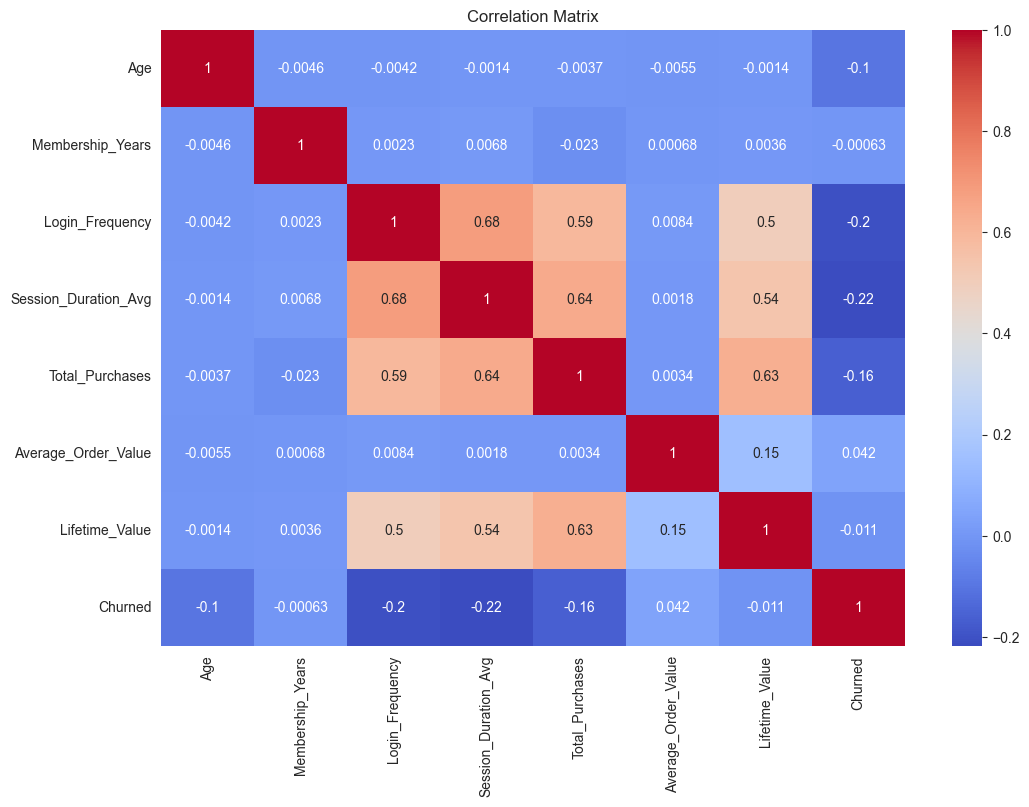

In [50]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols + ['Churned']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
outlier_report = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = ((df[col] < lower) | (df[col] > upper)).sum()
    pct = round(count / len(df) * 100, 2)

    outlier_report.append([col, count, pct])

outlier_df = pd.DataFrame(outlier_report,
                          columns=['Feature','Outlier_Count','Outlier_%']) \
               .sort_values(by='Outlier_%', ascending=False)

outlier_df


Feature  Outlier_Count  Outlier_%
6        Lifetime_Value           1684       3.37
1      Membership_Years           1581       3.16
5   Average_Order_Value           1005       2.01
4       Total_Purchases            629       1.26
3  Session_Duration_Avg            529       1.06
0                   Age            321       0.64
2       Login_Frequency            309       0.62

In [53]:
from scipy.stats.mstats import winsorize

def winsorize_series(series, lower_pct=0.01, upper_pct=0.99):
    lower = series.quantile(lower_pct)
    upper = series.quantile(upper_pct)
    return series.clip(lower=lower, upper=upper)



In [54]:
winsor_cols = [
    'Average_Order_Value',
    'Total_Purchases',
    'Session_Duration_Avg'
]

for col in winsor_cols:
    df[col] = winsorize_series(df[col])


for col in winsor_cols:
    print(col)
    print("Before:", df[col].describe())
    print("After :", winsorize_series(df[col]).describe())
    print("-" * 40)


# UseCase1 : Silent Churn Early Warning 
### Predict customers who are at risk of churn despite being recently active

In [55]:
# Do Churned users buy less?

df.groupby('Churned')['Total_Purchases'].mean()

Churned
0    13.582757
1    11.165813
Name: Total_Purchases, dtype: float64

In [56]:
# churned userss inactive for longer
df.groupby('Churned')['Days_Since_Last_Purchase'].mean()


Churned
0    27.383882
1    41.494602
Name: Days_Since_Last_Purchase, dtype: float64

In [57]:
# Are they still logging in
df.groupby('Churned')['Login_Frequency'].mean()

Churned
0    12.642391
1     9.120830
Name: Login_Frequency, dtype: float64

In [58]:
# Feature Selection

In [59]:
drop_cols = ['City', 'Lifetime_Value']


In [60]:
df['Has_Purchased'] = (df['Total_Purchases'] > 0).astype(int)
df['Is_Repeat_Customer'] = (df['Total_Purchases'] > 1).astype(int)
df['High_Return_Risk'] = (df['Returns_Rate'] > 20).astype(int)

In [61]:
df['Recency_Bucket'] = pd.cut(
    df['Days_Since_Last_Purchase'],
    bins=[-1, 30, 90, 180, 365, 10000],
    labels=['<1M','1-3M','3-6M','6-12M','>1Y'])

In [62]:
df['Revenue_Per_Purchase'] = df.apply(
    lambda x: x['Lifetime_Value'] / x['Total_Purchases']
    if x['Total_Purchases'] > 0 else 0,
    axis=1
)


In [64]:
# Converts categories into numeric signals

# drop_first=True avoids multicollinearity
df_encoded = pd.get_dummies(
    df,
    columns=['Gender','Country','Signup_Quarter','Recency_Bucket'],
    drop_first=True
)

In [65]:
df_model = df_encoded.drop(columns=drop_cols)


In [66]:
df_model.shape
df_model.columns


Index(['Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg',
       'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items',
       'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Credit_Balance', 'Churned',
       'Has_Purchased', 'Wishlist_to_Purchase_Ratio', 'Is_Repeat_Customer',
       'High_Return_Risk', 'Revenue_Per_Purchase', 'Gender_Male',
       'Gender_Other', 'Country_Canada', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_UK', 'Country_USA',
       'Signup_Quarter_Q2', 'Signup_Quarter_Q3', 'Signup_Quarter_Q4',
       'Recency_Bucket_1-3M', 'Recency_Bucket_3-6M', 'Recency_Bucket_6-12M',
       'Recency_Bucket_>1Y'],
      dtype='object')

In [67]:
X = df_model.drop('Churned', axis=1)
y = df_model['Churned']


In [68]:
print(X.shape)
print(y.shape)


(50000, 40)
(50000,)


In [69]:
X.isnull().sum().sum()


np.int64(0)


# Baseline Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred_proba = baseline_model.predict_proba(X_test)[:,1]
baseline_auc = roc_auc_score(y_test, y_pred_proba)

baseline_auc


C:\Users\T470\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.776630434253622

In [71]:
target_corr = df_model.corr()['Churned'].abs().sort_values(ascending=False)

print("Top 15 features correlated with 'Churned':")
print(target_corr.head(15))

Top 15 features correlated with 'Churned':
Churned                          1.000000
Customer_Service_Calls           0.287303
Cart_Abandonment_Rate            0.277963
Pages_Per_Session                0.224866
Session_Duration_Avg             0.217999
Email_Open_Rate                  0.215140
Mobile_App_Usage                 0.211478
Login_Frequency                  0.204379
Social_Media_Engagement_Score    0.179715
Total_Purchases                  0.177598
Wishlist_Items                   0.177308
Product_Reviews_Written          0.168224
Average_Order_Value              0.161367
Credit_Balance                   0.147935
Revenue_Per_Purchase             0.138916
Name: Churned, dtype: float64


In [72]:
# 
low_corr_features = target_corr[target_corr < 0.01].index.tolist()
if 'Churned' in low_corr_features:
    low_corr_features.remove('Churned')

In [73]:
X_filtered = X.drop(columns=low_corr_features)

In [74]:
print("\nDropped low-correlation features:", low_corr_features)
print("Remaining features after low-correlation filter:", X_filtered.shape[1])


Dropped low-correlation features: ['Signup_Quarter_Q2', 'Signup_Quarter_Q4', 'Gender_Other', 'Signup_Quarter_Q3', 'Country_Japan', 'Payment_Method_Diversity', 'Country_Canada', 'Gender_Male', 'Country_USA', 'Country_UK', 'Country_India', 'Membership_Years', 'Country_Germany']
Remaining features after low-correlation filter: 27


In [87]:
corr_matrix = X_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [88]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("\nHighly correlated features to drop:", to_drop)


Highly correlated features to drop: ['Recency_Bucket_>1Y']


In [109]:
X_final = X_filtered.drop(columns=to_drop)
print("Remaining features after multicollinearity check:", X_final.shape[1])

Remaining features after multicollinearity check: 26


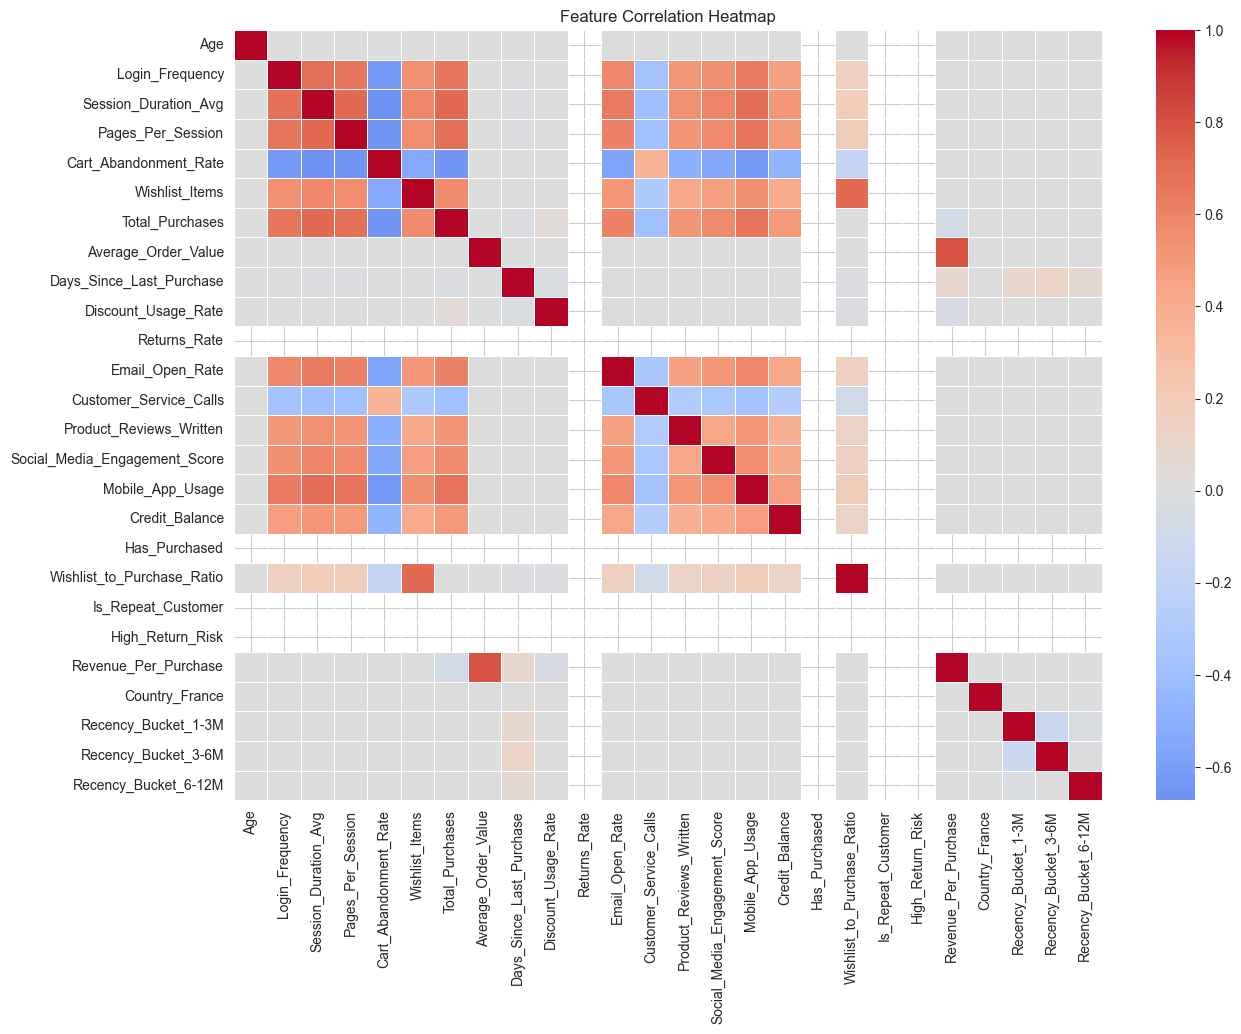

In [110]:
plt.figure(figsize=(14,10))
sns.heatmap(X_final.corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducible results
    stratify=y              # maintain class distribution
)

In [112]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)  
model_lr.fit(X_train, y_train)

C:\Users\T470\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [113]:
y_pred_proba = model_lr.predict_proba(X_test)[:,1]
auc_final = roc_auc_score(y_test, y_pred_proba)
print("\nFinal ROC-AUC on test set:", auc_final)


Final ROC-AUC on test set: 0.7766725796796754


In [114]:
coef_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': model_lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 features by impact:")
print(coef_df.head(10))


Top 10 features by impact:
                     Feature  Coefficient
12    Customer_Service_Calls     0.201644
23       Recency_Bucket_1-3M     0.065960
24       Recency_Bucket_3-6M     0.056653
6            Total_Purchases     0.052323
4      Cart_Abandonment_Rate     0.033968
8   Days_Since_Last_Purchase     0.009149
7        Average_Order_Value     0.007347
25      Recency_Bucket_6-12M     0.003934
21      Revenue_Per_Purchase     0.002702
16            Credit_Balance     0.000009


In [115]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_cv = LogisticRegression(max_iter=1000)

cv_auc = cross_val_score(
    model_cv,
    X_final,
    y,
    cv=cv,
    scoring='roc_auc'
)

print("\nCross-validated ROC-AUC scores:", cv_auc)
print("Mean CV AUC:", np.mean(cv_auc))

C:\Users\T470\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T470\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://sci


Cross-validated ROC-AUC scores: [0.77289363 0.76962463 0.77526063 0.7794982  0.77409575]
Mean CV AUC: 0.7742745682040499


C:\Users\T470\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
df_model
X = df_model.drop('Churned', axis=1)
y = df_model['Churned']


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_base.fit(X_train, y_train)

y_pred_proba = rf_base.predict_proba(X_test)[:,1]
rf_base_auc = roc_auc_score(y_test, y_pred_proba)

rf_base_auc


0.9196576292467843

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_base.fit(X_train, y_train)

y_pred_proba = rf_base.predict_proba(X_test)[:,1]
rf_base_auc = roc_auc_score(y_test, y_pred_proba)

rf_base_auc


In [121]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_base.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(15)


Feature  Importance
13         Customer_Service_Calls    0.112491
5           Cart_Abandonment_Rate    0.093092
0                             Age    0.073859
7                 Total_Purchases    0.068561
23           Revenue_Per_Purchase    0.067540
10            Discount_Usage_Rate    0.060165
8             Average_Order_Value    0.055569
9        Days_Since_Last_Purchase    0.048817
12                Email_Open_Rate    0.047233
4               Pages_Per_Session    0.044752
3            Session_Duration_Avg    0.043021
16               Mobile_App_Usage    0.039162
2                 Login_Frequency    0.030990
18                 Credit_Balance    0.030262
15  Social_Media_Engagement_Score    0.030118

In [122]:
important_features = feature_importance[
    feature_importance['Importance'] > 0.005
]['Feature'].tolist()

X_train_fs = X_train[important_features]
X_test_fs = X_test[important_features]


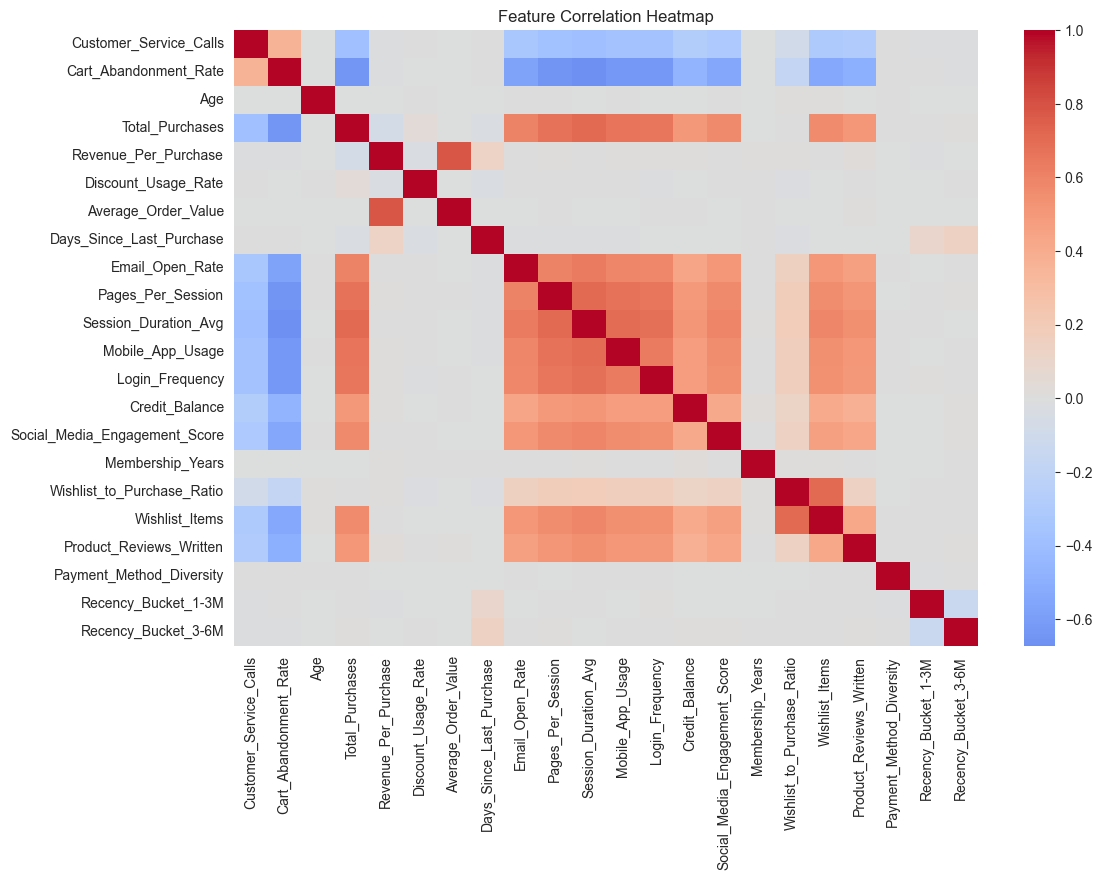

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(
    X_train_fs.corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [124]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=30,
    min_samples_split=40,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train_fs, y_train)

y_pred_final = rf_final.predict_proba(X_test_fs)[:,1]
rf_final_auc = roc_auc_score(y_test, y_pred_final)

rf_final_auc


0.9152545028932397

In [125]:
rf_final_cv = cross_val_score(
    rf_final,
    X_train_fs,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

print("Final RF CV Scores:", rf_final_cv)
print("Final Mean CV AUC:", rf_final_cv.mean())


Final RF CV Scores: [0.91426633 0.91315635 0.91115614 0.90812147 0.90043942]
Final Mean CV AUC: 0.909427940324802


In [126]:
y_test_proba = rf_final.predict_proba(X_test_fs)[:, 1]


In [127]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_default = (y_test_proba >= 0.5).astype(int)

cm_default = confusion_matrix(y_test, y_pred_default)
print(cm_default)

print(classification_report(y_test, y_pred_default))


[[6213  897]
 [ 427 2463]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7110
           1       0.73      0.85      0.79      2890

    accuracy                           0.87     10000
   macro avg       0.83      0.86      0.85     10000
weighted avg       0.88      0.87      0.87     10000



In [128]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred = (y_test_proba >= t).astype(int)
    results.append({
        'Threshold': t,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

import pandas as pd
threshold_df = pd.DataFrame(results)
threshold_df


Threshold  Precision    Recall        F1
0        0.10   0.289740  0.999654  0.449265
1        0.15   0.339026  0.975433  0.503168
2        0.20   0.416323  0.944291  0.577872
3        0.25   0.476877  0.927682  0.629934
4        0.30   0.533816  0.917647  0.674981
5        0.35   0.583148  0.907612  0.710070
6        0.40   0.633138  0.895156  0.741686
7        0.45   0.681513  0.878893  0.767720
8        0.50   0.733036  0.852249  0.788160
9        0.55   0.782810  0.819377  0.800676
10       0.60   0.830231  0.771626  0.799857
11       0.65   0.876706  0.711073  0.785250
12       0.70   0.913219  0.626298  0.743021
13       0.75   0.938048  0.518685  0.668004
14       0.80   0.957709  0.376125  0.540124
15       0.85   0.965517  0.222837  0.362103

In [129]:
best_threshold = 0.40

In [130]:
y_pred_optimal = (y_test_proba >= best_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
print(cm_optimal)
print(classification_report(y_test, y_pred_optimal))


[[5611 1499]
 [ 303 2587]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7110
           1       0.63      0.90      0.74      2890

    accuracy                           0.82     10000
   macro avg       0.79      0.84      0.80     10000
weighted avg       0.86      0.82      0.83     10000



In [131]:
import pandas as pd

input_data = {
    'Age': 32,
    'Login_Frequency': 18,
    'Session_Duration_Avg': 22.5,
    'Pages_Per_Session': 6,
    'Total_Purchases': 3,
    'Average_Order_Value': 110,
    'Cart_Abandonment_Rate': 45,
    'Customer_Service_Calls': 2,
    'Email_Open_Rate': 35,
    'Mobile_App_Usage': 1,
    'Wishlist_Items': 4,
    'Revenue_Per_Purchase': 140,
    'Discount_Dependent': 1
}

input_df = pd.DataFrame([input_data])


In [139]:
input_df = input_df.reindex(columns=important_features, fill_value=0)


In [1]:
# proba = model.predict_proba(input_df)[:, 1]
# prediction = (proba >= threshold).astype(int)

# print("Churn Probability:", round(proba[0], 3))
# print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")


In [ ]:
# # Fill missing features with 0
# for col in features:
#     if col not in input_df.columns:
#         input_df[col] = 0


In [ ]:
# artifact = joblib.load("churn_rf_deployment.pkl")

# model = artifact["model"]
# features = artifact["features"]
# threshold = artifact["threshold"]

# input_data = {
#     'age':32,
#     'Login_Frequency': 18,
#     'Session_Duration_Avg': 22.5,
#     'Total_Purchases': 3,
#     'Average_Order_Value': 110,
#     'Cart_Abandonment_Rate': 45,
#     'Customer_Service_Calls': 2,
#     'Wishlist_Items': 4,
#     'Revenue_Per_Purchase': 140,
#     'Discount_Dependent': 1
#     # ⚠️ include ALL selected features
# }

# input_df = pd.DataFrame([input_data])

# proba = model.predict_proba(input_df[features])[:, 1]
# prediction = (proba >= threshold).astype(int)



In [ ]:
# joblib.dump(X_filtered.columns.tolist(), "model_features.pkl")



# Churn and LifeTime Value Prediction

In [148]:
df['Recency'] = df['Days_Since_Last_Purchase']
df['Frequency'] = df['Total_Purchases']
df['Monetary'] = df['Lifetime_Value']
df['Engagement_Score'] = df['Login_Frequency']*0.3 + df['Pages_Per_Session']*0.2 + df['Session_Duration_Avg']*0.5
df['Discount_Sensitivity'] = df['Discount_Usage_Rate'] * (1 + df['Returns_Rate']/100)

In [149]:
X = df[['Average_Order_Value','Total_Purchases','Membership_Years','Days_Since_Last_Purchase',
        'Cart_Abandonment_Rate','Discount_Usage_Rate','Returns_Rate','Login_Frequency',
        'Customer_Service_Calls','Gender','Country','Signup_Quarter']]

y_clv = df['Lifetime_Value']
y_churn = df['Churned']

In [150]:
X_train, X_test, y_clv_train, y_clv_test, y_churn_train, y_churn_test = train_test_split(
    X, y_clv, y_churn, test_size=0.2, random_state=42, stratify=y_churn
)

In [151]:
num_cols = ['Average_Order_Value','Total_Purchases','Membership_Years','Days_Since_Last_Purchase',
            'Cart_Abandonment_Rate','Discount_Usage_Rate','Returns_Rate','Login_Frequency',
            'Customer_Service_Calls']

cat_cols = ['Gender','Country','Signup_Quarter']

In [153]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [154]:
# Preprocess training and testing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [155]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
from imblearn.over_sampling import SMOTE


In [157]:
# Handle Imbalance for Churn

smote = SMOTE(random_state=42)
X_train_churn_res, y_churn_train_res = smote.fit_resample(X_train_preprocessed, y_churn_train)

In [158]:
# CLV Regression

from sklearn.ensemble import RandomForestRegressor
rf_clv = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
rf_clv.fit(X_train_preprocessed, y_clv_train)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [159]:
# Churn Classification
rf_churn = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
rf_churn.fit(X_train_churn_res, y_churn_train_res)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=42)

In [160]:
# 9️⃣ Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# CLV Regression
y_clv_pred = rf_clv.predict(X_test_preprocessed)
rmse = np.sqrt(mean_squared_error(y_clv_test, y_clv_pred))
r2 = r2_score(y_clv_test, y_clv_pred)
print(f"CLV Regression → RMSE: {rmse:.2f}, R²: {r2:.3f}")

CLV Regression → RMSE: 215.65, R²: 0.942


In [161]:
# Churn Classification
y_churn_pred = rf_churn.predict(X_test_preprocessed)
y_churn_proba = rf_churn.predict_proba(X_test_preprocessed)[:,1]
print("Churn Classification Report:")
print(classification_report(y_churn_test, y_churn_pred))
print("ROC-AUC Score:", roc_auc_score(y_churn_test, y_churn_proba))

Churn Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7110
           1       0.68      0.71      0.69      2890

    accuracy                           0.82     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.82      0.82      0.82     10000

ROC-AUC Score: 0.8579270874395923


### Chrun regression CV

In [162]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Pipeline (no leakage)
churn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=8,
        random_state=42,
        n_jobs=-1
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    churn_pipeline,
    X,
    y_churn,
    cv=cv,
    scoring='roc_auc'
)

print("CV ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())
print("Std Dev:", cv_scores.std())


CV ROC-AUC scores: [0.83963836 0.83610617 0.83797162 0.83707834 0.84478964]
Mean CV ROC-AUC: 0.8391168245903474
Std Dev: 0.0030654122819001525


### CLV regression cv

In [182]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from imblearn.pipeline import Pipeline 


clv_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=60,
        max_depth=8,
        min_samples_leaf=5,
        random_state=42,
        max_features="sqrt",
    ))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = -cross_val_score(
    clv_pipeline,
    X,
    y_clv,
    cv=kf,
    scoring='neg_root_mean_squared_error'
)

print("CV RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std Dev:", rmse_scores.std())


CV RMSE scores: [438.58301576 433.35211771 451.70831305 448.59735258 414.84977131]
Mean RMSE: 437.41811408125176
Std Dev: 13.087433495979521


In [183]:
#  Feature Importance

feature_names = preprocessor.get_feature_names_out()

In [184]:
imp_clv = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_clv.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [185]:
imp_churn = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_churn.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [186]:

print("Top CLV Features:\n", imp_clv.head(10))
print("Top Churn Features:\n", imp_churn.head(10))

Top CLV Features:
                           Feature  Importance
1            num__Total_Purchases    0.529570
0        num__Average_Order_Value    0.410071
23         cat__Signup_Quarter_Q4    0.025263
2           num__Membership_Years    0.007503
4      num__Cart_Abandonment_Rate    0.006526
7            num__Login_Frequency    0.005492
5        num__Discount_Usage_Rate    0.004528
3   num__Days_Since_Last_Purchase    0.004085
8     num__Customer_Service_Calls    0.002550
19               cat__Country_USA    0.000463
Top Churn Features:
                           Feature  Importance
8     num__Customer_Service_Calls    0.264254
4      num__Cart_Abandonment_Rate    0.176978
1            num__Total_Purchases    0.154431
0        num__Average_Order_Value    0.110800
3   num__Days_Since_Last_Purchase    0.080446
7            num__Login_Frequency    0.072273
5        num__Discount_Usage_Rate    0.049431
2           num__Membership_Years    0.025475
19               cat__Country_USA    0.0

In [169]:
OneHotEncoder(
    handle_unknown="ignore",
    min_frequency=0.01,
    sparse=True
)


OneHotEncoder(handle_unknown='ignore', min_frequency=0.01)

In [188]:
# import joblib

# # Save all components in one dictionary
# pipeline_data = {
#     'preprocessor': preprocessor,  # ColumnTransformer
#     'clv_model': rf_clv,           # RandomForestRegressor
#     'churn_model': rf_churn        # RandomForestClassifier
# }

# # Save to file
# joblib.dump(pipeline_data, "clv_churn_pipeline.pkl")
# print("✅ Pipeline saved as clv_churn_pipeline.pkl")





In [170]:
import joblib

joblib.dump(preprocessor, "preprocessor.pkl", compress=3)


['preprocessor.pkl']

In [189]:
joblib.dump(rf_clv, "clv_model.pkl", compress=7)


['clv_model.pkl']

In [172]:
joblib.dump(rf_churn, "churn_model.pkl", compress=3)


['churn_model.pkl']

In [175]:
import joblib
import pandas as pd


#  Load Saved Artifacts

preprocessor = joblib.load("preprocessor.pkl")
clv_model = joblib.load("clv_model.pkl")
churn_model = joblib.load("churn_model.pkl")


#  Example Input

input_df = pd.DataFrame([{
    'Average_Order_Value': 150,
    'Total_Purchases': 7,
    'Membership_Years': 3,
    'Days_Since_Last_Purchase': 20,
    'Cart_Abandonment_Rate': 15,
    'Discount_Usage_Rate': 10,
    'Returns_Rate': 5,
    'Login_Frequency': 20,
    'Customer_Service_Calls': 1,
    'Gender': 'Female',
    'Country': 'USA',
    'Signup_Quarter': 'Q2'
}])


#  Preprocess Input

X_input = preprocessor.transform(input_df)

#  Predictions

predicted_clv = clv_model.predict(X_input)[0]
predicted_churn_prob = churn_model.predict_proba(X_input)[:, 1][0]

#  Output

print(f"Predicted CLV: ${predicted_clv:,.2f}")
print(f"Predicted Churn Probability: {predicted_churn_prob * 100:.1f}%")


Predicted CLV: $1,012.72
Predicted Churn Probability: 30.2%
